In [12]:
import pandas as pd

# Load the JSON data into a DataFrame
df = pd.read_json('request_body.json')

# Print the columns
print("Columns:")
print(df.columns)

# Print the number of rows and columns
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

# Print the data types of each column
print("Data types:")
print(df.dtypes)


Columns:
Index(['labels', 'parameters', 'history', 'future'], dtype='object')
Number of rows: 12
Number of columns: 4
Data types:
labels        object
parameters    object
history       object
future        object
dtype: object


In [13]:
print(f"History: {df["history"]["times"]}")
print(f"Future: {df["future"]["times"]}")

History: ['2023-08-09T15:15:00Z', '2023-08-09T15:30:00Z', '2023-08-09T15:45:00Z', '2023-08-09T16:00:00Z', '2023-08-09T16:15:00Z', '2023-08-09T16:30:00Z', '2023-08-09T16:45:00Z', '2023-08-09T17:00:00Z', '2023-08-09T17:15:00Z', '2023-08-09T17:30:00Z', '2023-08-09T17:45:00Z', '2023-08-09T18:00:00Z', '2023-08-09T18:15:00Z', '2023-08-09T18:30:00Z', '2023-08-09T18:45:00Z', '2023-08-09T19:00:00Z', '2023-08-09T19:15:00Z', '2023-08-09T19:30:00Z', '2023-08-09T19:45:00Z', '2023-08-09T20:00:00Z', '2023-08-09T20:15:00Z', '2023-08-09T20:30:00Z', '2023-08-09T20:45:00Z', '2023-08-09T21:00:00Z', '2023-08-09T21:15:00Z', '2023-08-09T21:30:00Z', '2023-08-09T21:45:00Z', '2023-08-09T22:00:00Z', '2023-08-09T22:15:00Z', '2023-08-09T22:30:00Z', '2023-08-09T22:45:00Z', '2023-08-09T23:00:00Z', '2023-08-09T23:15:00Z', '2023-08-09T23:30:00Z', '2023-08-09T23:45:00Z', '2023-08-10T00:00:00Z', '2023-08-10T00:15:00Z', '2023-08-10T00:30:00Z', '2023-08-10T00:45:00Z', '2023-08-10T01:00:00Z', '2023-08-10T01:15:00Z', '2023-

In [14]:
print(f"History: {df["history"]["data"].keys()}")
print(len(df["history"]["data"]["windspeed_10m"]))

print(f"Future: {df["future"]["data"].keys()}") # predict y
print(len(df["future"]["data"]["shortwave_radiation"]))
print(len(df["future"]["data"]["temperature_2m"]))
print(len(df["future"]["data"]["windspeed_10m"]))

print(df["history"]["data"]["y"])


History: dict_keys(['shortwave_radiation', 'temperature_2m', 'windspeed_10m', 'y'])
9440
Future: dict_keys(['shortwave_radiation', 'temperature_2m', 'windspeed_10m'])
832
832
832
[5288480.0, 5228632.0, 5058448.0, 5036708.0, 4844940.0, 4767852.0, 4625036.0, 4526440.0, 4484024.0, 4450580.0, 4375488.0, 4346260.0, 4367364.0, 4412940.0, 4282684.0, 4306432.0, 4192200.0, 4160016.0, 4224012.0, 4016004.0, 4128000.0, 4064000.0, 4032000.0, 4016000.0, 3808000.0, 3632000.0, 3648000.0, 3648000.0, 3504000.0, 3616000.0, 3616000.0, 3472000.0, 3488000.0, 3488000.0, 3568000.0, 3552000.0, 3616000.0, 3568000.0, 3520000.0, 3568000.0, 3504000.0, 3456000.0, 3552000.0, 3552000.0, 3472000.0, 3472000.0, 3472000.0, 3456000.0, 3648000.0, 3712000.0, 3760000.0, 3696000.0, 3888008.0, 3904152.0, 4066272.0, 4116468.0, 4476384.0, 4534068.0, 4704888.0, 4738412.0, 4709352.0, 4812264.0, 4964056.0, 5046200.0, 5100452.0, 5154248.0, 5239376.0, 5258572.0, 5341608.0, 5374124.0, 5326840.0, 5358728.0, 5419060.0, 5426764.0, 550956

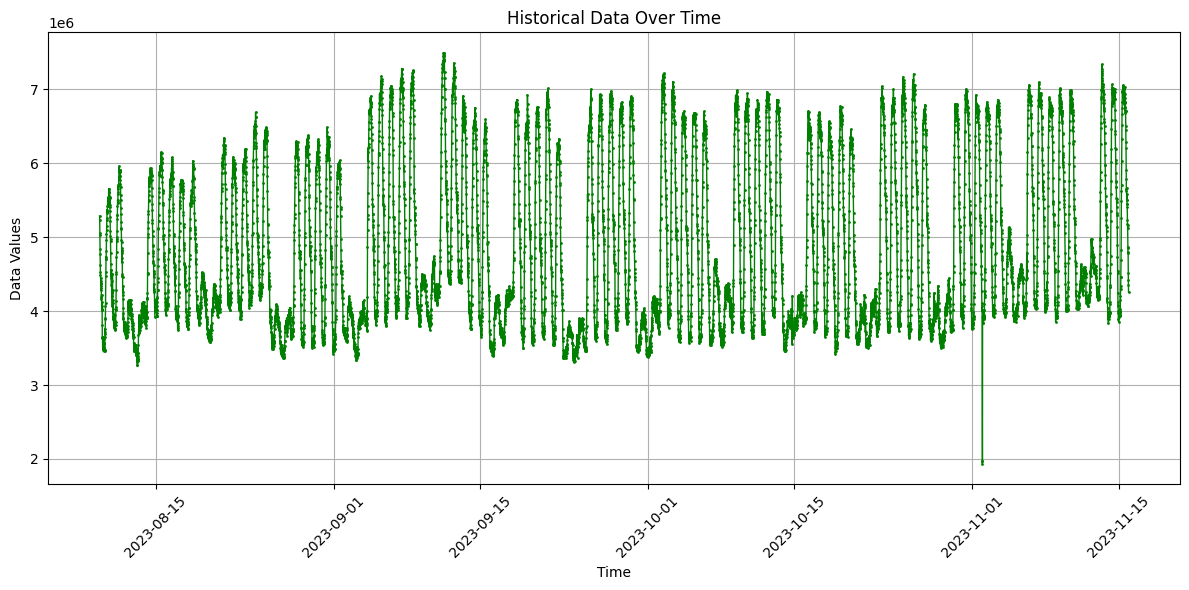

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the history data from the loaded JSON
history_times = df['history']['times']
history_data = df['history']['data']['y']

# Creating a DataFrame
df = pd.DataFrame({
    'Time': pd.to_datetime(history_times),
    'Data': history_data
})

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Data'], color='green', marker='o', linewidth=1, markersize=1)
plt.title('Historical Data Over Time')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Signal decomposition

1. Trend Component: Illustrates the long-term movement in the data.
2. Seasonal Component: Now shows variations that repeat over the assumed period, representing the possible seasonal patterns in the data.
3. Residual Component: Captures the irregularities or noise in the data, which are not explained by the trend or seasonal patterns.
4. Original Data: Displayed for comparison with the decomposed components.

C:\Users\radus\AppData\Local\Temp\ipykernel_22616\3797601894.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


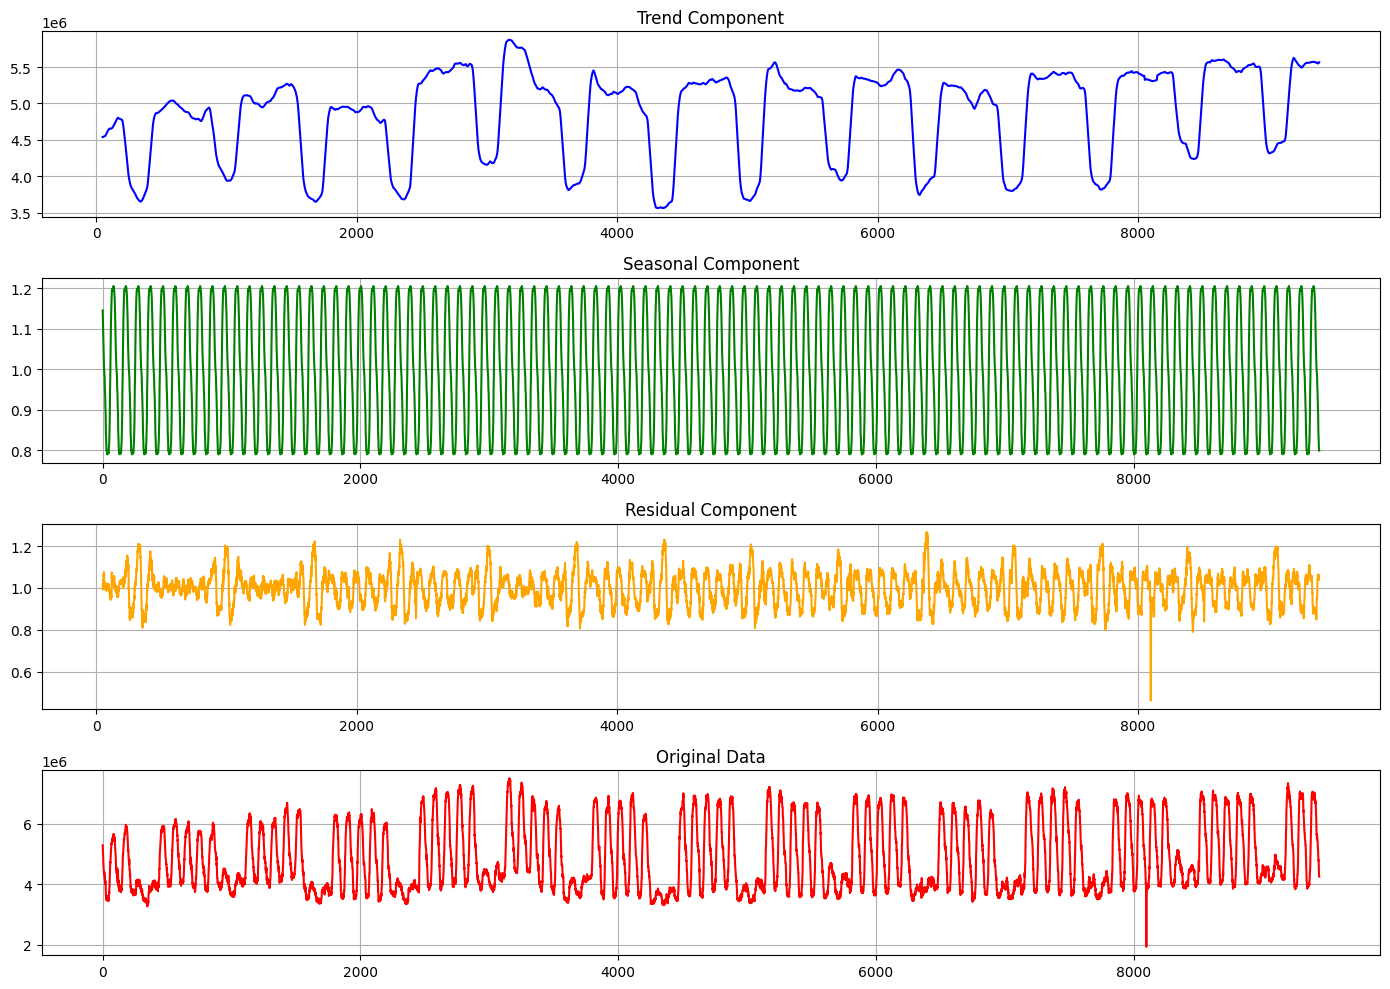

In [17]:
# Attempting a multiplicative decomposition with a different period
# Here, I will choose a period that might represent a possible seasonal cycle.
# This is a trial-and-error process without specific domain knowledge.

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming a daily cycle for this example (number of data points per day)
# This is just an assumption and may need adjustment based on actual data characteristics
# Assuming there are 96 data points per day (as data is collected every 15 minutes)

period_guess = 96 

# Handling missing values using forward fill
df_filled = df.fillna(method='ffill')
# Reattempting seasonal decomposition with multiplicative model
decomposition_multiplicative = seasonal_decompose(df_filled['Data'], model='multiplicative', period=period_guess)

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

# Trend component
plt.subplot(411)
plt.plot(decomposition_multiplicative.trend, color='blue')
plt.title('Trend Component')
plt.grid(True)

# Seasonal component
plt.subplot(412)
plt.plot(decomposition_multiplicative.seasonal, color='green')
plt.title('Seasonal Component')
plt.grid(True)

# Residual component
plt.subplot(413)
plt.plot(decomposition_multiplicative.resid, color='orange')
plt.title('Residual Component')
plt.grid(True)

# Original Data
plt.subplot(414)
plt.plot(df_filled['Data'], color='red')
plt.title('Original Data')
plt.grid(True)

plt.tight_layout()
plt.show()


# Test for stationary
 - check if the statistical properties like mean, variance, and autocorrelation do not change over time

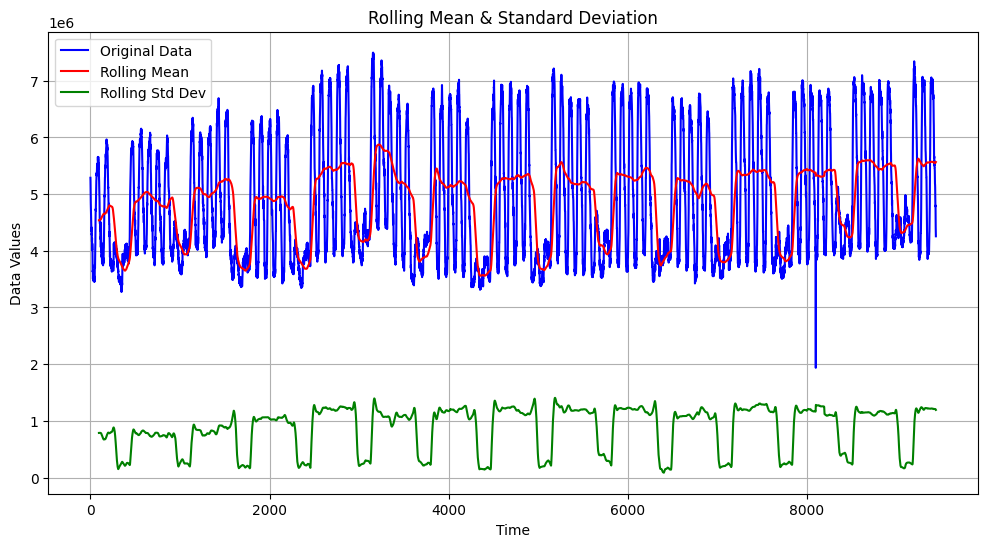

In [ ]:
# Calculating rolling mean and standard deviation
rolling_mean = df_filled['Data'].rolling(window=96).mean()  # window size is assumed to be 1 day (96 points)
rolling_std = df_filled['Data'].rolling(window=96).std()

# Plotting the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df_filled['Data'], color='blue', label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.grid(True)
plt.show()


Interpretation: rolling mean and standard deviation appear fairly stable => stationary, but since there is seasonality, we might need to look more into it.

- seasonality does not rule out stationarity

# The Augmented Dickey-Fuller (ADF) test

Criteria for stationarity:
- The p-value should be less than the significance level (commonly 0.05)
- The more negative the test statistic, the more likely we are to reject the null hypothesis (data has no unit root, i.e., is stationary)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test to check stationarity
adf_test = adfuller(df_filled['Data'])

# Extracting the p-value and test statistics
adf_statistic = adf_test[0]
p_value = adf_test[1]


stationarity_result = {
    "ADF Statistic": adf_statistic,
    "p-value": p_value,
    "Is Stationary?": p_value < 0.05  # Common threshold for significance
}

stationarity_result



{'ADF Statistic': -10.982987817853639,
 'p-value': 7.37818232351625e-20,
 'Is Stationary?': True}

# Other features
- Shortwave Radiation Over Time: Plotted in orange, it shows the changes in shortwave radiation levels over the given time period.
- Temperature at 2m Over Time: Plotted in red, it indicates how the temperature 2 meters above ground level varies over time.
- Windspeed at 10m Over Time: Plotted in blue, it represents the variations in wind speed 10 meters above ground level over time.

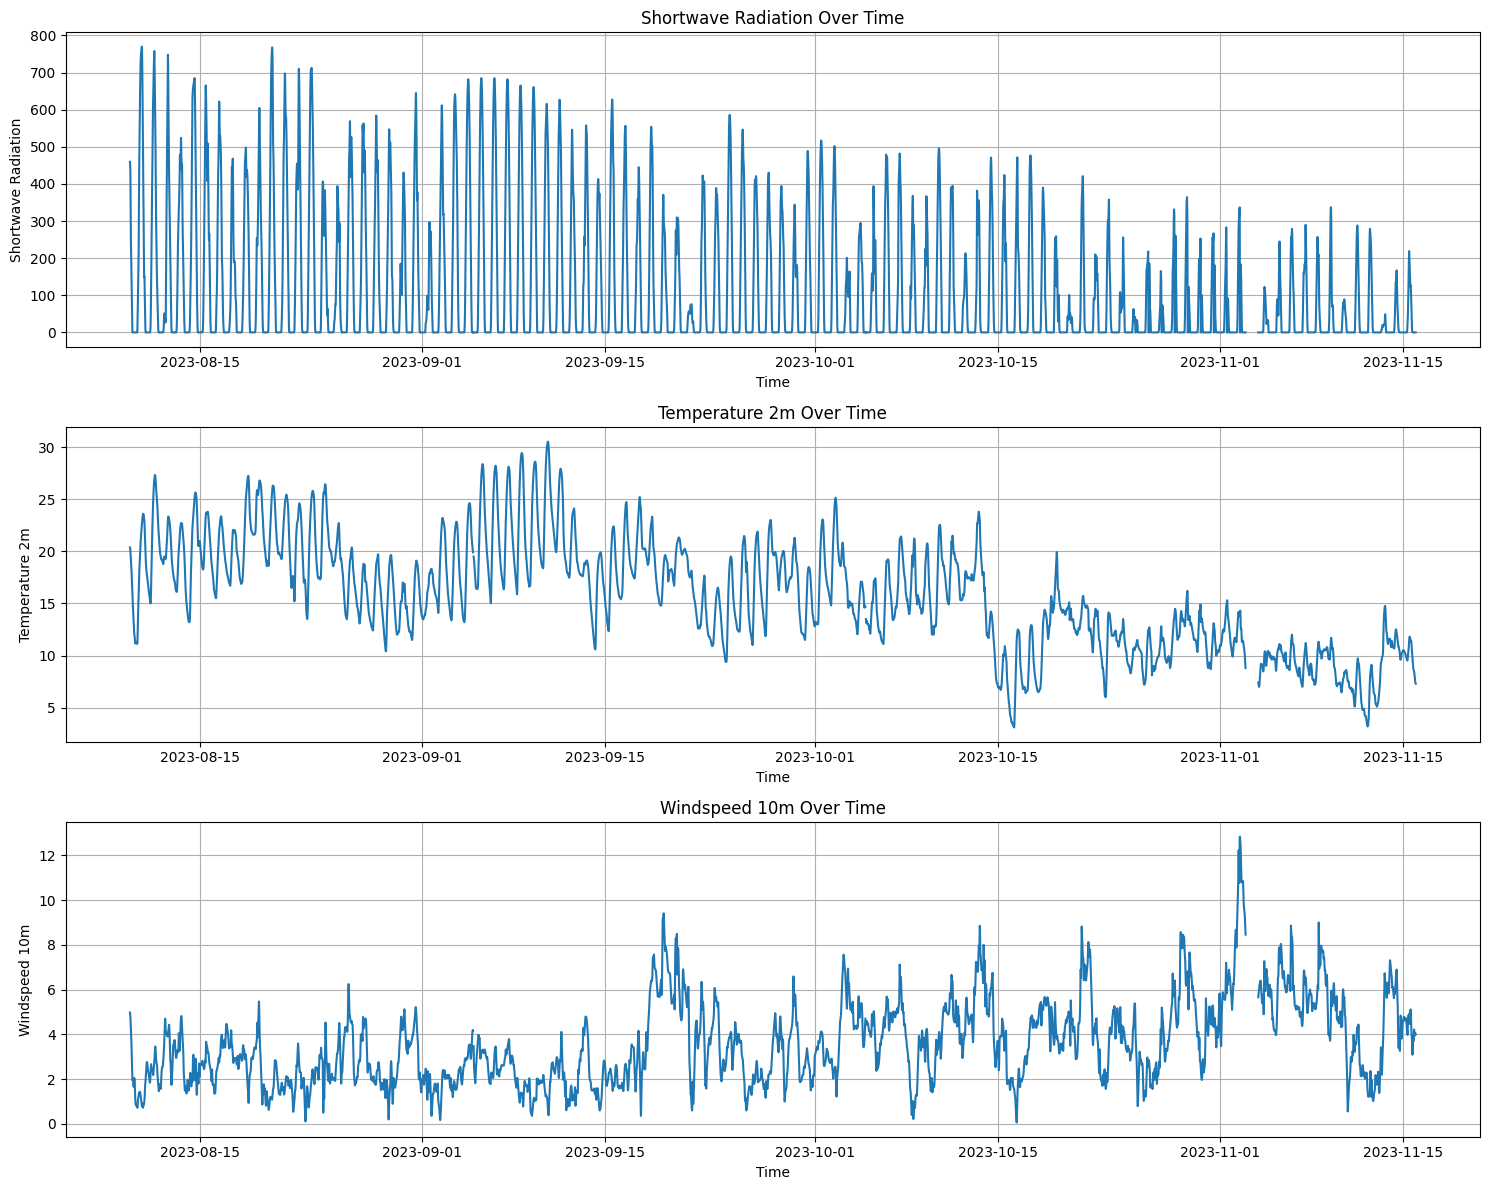

In [ ]:
import matplotlib.pyplot as plt

def plot_features(df, feature_names):
    """
    Plot the given features against time.
    
    Parameters:
    - df: pandas DataFrame containing the time and feature data
    - feature_names: list of feature names to plot
    
    Returns:
    - None
    """
    plt.figure(figsize=(15, 12))
    
    for i, feature_name in enumerate(feature_names):
        plt.subplot(len(feature_names), 1, i+1)
        plt.plot(df['Time'], df[feature_name])
        plt.title(f'{feature_name} Over Time')
        plt.xlabel('Time')
        plt.ylabel(feature_name)
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Creating a DataFrame for all features
df_all_features = pd.DataFrame({
    'Time': pd.to_datetime(history_times),
    'Shortwave Radiation': data['history']['data']['shortwave_radiation'],
    'Temperature 2m': data['history']['data']['temperature_2m'],
    'Windspeed 10m': data['history']['data']['windspeed_10m']
})

# List of feature names to plot
feature_names = ['Shortwave Radiation', 'Temperature 2m', 'Windspeed 10m']

# Plotting all features against time
plot_features(df_all_features, feature_names)
